<h1> Dallas and Austin Airbnb Data Analysis</h1>

<h2> Buisness Questions </h2>

The goal of this notebook is to answer the following questions using the airbnb data for the Austin, Texas and Dallas, Texas areas:

1. How do the prices for the Dallas airbnb's compare with the Austin airbnb's?


2. Does price correlate well with anything? Do the number of reviews correlate well with the availability? Are there any numerical columns that have a high correlation with other columns?


3. How well can we predict the price of an airbnb at the Dallas location?

<h3> Gather the Data </h3>

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
font = {'size' : 22}
matplotlib.rc('font',**font)

df_dallas = pd.read_csv("Dallas_Bnb_Data.csv")
df_austin = pd.read_csv("Austin_Bnb_Data.csv")

df_austin.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26057,-97.73441,Entire home/apt,240,2,585,2022-03-07,3.69,1,305,42,NaN
1,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,42,1,264,2021-07-03,1.81,1,0,3,NaN
2,6413,Gem of a Studio near Downtown,13879,Todd,NaN,78704,30.24885,-97.73587,Entire home/apt,109,3,117,2021-07-01,0.78,1,0,2,NaN
3,6448,"Secluded Studio @ Zilker - King Bed, Bright & ...",14156,Amy,NaN,78704,30.26034,-97.76487,Entire home/apt,325,3,268,2022-03-06,2.09,1,107,30,NaN
4,8502,Woodland Studio Lodging,25298,Karen,NaN,78741,30.23466,-97.73682,Entire home/apt,44,3,48,2021-11-13,0.33,1,26,2,NaN


In [2]:
df_dallas.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,61878,MODERN LIVING AND FURNISHINGS,300211,Rita,NaN,District 2,32.81690,-96.82018,Entire home/apt,80,30,45,2022-02-28,0.33,1,40,6,NaN
1,247794,Private Room in North Dallas,78344,J. Yuriko,NaN,District 10,32.88789,-96.71170,Private room,57,2,0,NaN,NaN,1,365,0,NaN
2,776810,Goldies Bohemian Loft,4096626,Eric,NaN,District 2,32.81462,-96.81586,Entire home/apt,75,5,29,2020-03-26,0.25,1,285,0,NaN
3,795703,Amazing location walk to Downtown Dallas,4191322,Michelle,NaN,District 14,32.80327,-96.80976,Entire home/apt,243,30,69,2021-11-19,0.62,1,270,1,NaN
4,826118,Far North Dallas -- Blue Room,804559,Rod,NaN,District 12,32.98825,-96.78926,Private room,54,2,17,2022-04-05,0.21,3,241,2,NaN


<h3> Assess the Data </h3>

**1.** How big are both of the datasets?

In [3]:
df_austin.shape

(11972, 18)

In [4]:
df_dallas.shape

(5299, 18)

**2.** What columns have no missing values?

In [5]:
df_austin.loc[:,df_austin.isna().sum() == 0].columns

Index(['id', 'name', 'host_id', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [6]:
df_dallas.loc[:,df_dallas.isna().sum() == 0].columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm'],
      dtype='object')

**3.** Which columns have missing values, and what percentage of rows in those columns are missing?

In [7]:
df_austin.loc[:,df_austin.isna().mean() != 0].isna().mean()


host_name              0.000251
neighbourhood_group    1.000000
last_review            0.246074
reviews_per_month      0.246074
license                1.000000
dtype: float64

In [8]:
df_dallas.loc[:,df_dallas.isna().mean() != 0].isna().mean()

neighbourhood_group    1.000000
last_review            0.202302
reviews_per_month      0.202302
license                1.000000
dtype: float64

**4.** What are some general statistics about the non-categorical data?

In [9]:
df_austin.describe()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,1.197200e+04,1.197200e+04,0.0,11972.000000,11972.000000,11972.000000,11972.000000,11972.000000,11972.000000,9026.000000,11972.000000,11972.000000,11972.000000,0.0
mean,4.901687e+16,1.172505e+08,NaN,78724.311143,30.283026,-97.751571,341.349900,8.574424,33.952639,1.508366,20.345807,138.822503,9.939609,NaN
std,1.586553e+17,1.310440e+08,NaN,20.997882,0.063970,0.062720,571.136316,28.219515,73.445409,1.862695,61.329128,136.857047,19.055479,NaN
min,5.456000e+03,2.300000e+01,NaN,78701.000000,30.078870,-98.070940,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.885529e+07,1.280817e+07,NaN,78704.000000,30.244370,-97.768878,116.750000,1.000000,1.000000,0.230000,1.000000,0.000000,0.000000,NaN
50%,3.900587e+07,5.759266e+07,NaN,78723.000000,30.270065,-97.741920,200.000000,2.000000,6.000000,0.910000,1.000000,90.000000,1.000000,NaN
75%,5.117619e+07,1.908217e+08,NaN,78745.000000,30.310472,-97.718400,361.000000,3.000000,31.000000,2.090000,5.000000,282.000000,12.000000,NaN
max,5.805900e+17,4.489213e+08,NaN,78759.000000,30.515090,-97.560620,20000.000000,1100.000000,1000.000000,37.700000,338.000000,365.000000,431.000000,NaN


In [10]:
df_dallas.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,5.299000e+03,5.299000e+03,0.0,5299.000000,5299.000000,5299.000000,5299.000000,5299.000000,4227.000000,5299.000000,5299.000000,5299.000000,0.0
mean,9.597552e+16,1.891032e+08,NaN,32.822905,-96.793564,166.395546,9.063786,30.952066,2.217670,32.595395,219.797509,13.512550,NaN
std,2.139285e+17,1.465835e+08,NaN,0.069279,0.056052,233.140169,23.223317,62.638310,2.244708,76.923291,128.360305,22.022629,NaN
min,6.187800e+04,4.342200e+04,NaN,32.633790,-96.993240,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,3.805792e+07,5.212789e+07,NaN,32.782565,-96.821510,89.000000,1.000000,1.000000,0.610000,1.000000,89.000000,0.000000,NaN
50%,4.875159e+07,1.404745e+08,NaN,32.807840,-96.795650,121.000000,2.000000,8.000000,1.560000,4.000000,258.000000,5.000000,NaN
75%,5.332671e+07,3.428291e+08,NaN,32.845170,-96.772420,186.000000,5.000000,31.000000,3.160000,19.000000,344.000000,18.000000,NaN
max,6.008196e+17,4.531709e+08,NaN,33.017260,-96.464370,9999.000000,1000.000000,858.000000,35.090000,321.000000,365.000000,361.000000,NaN


**5.** How many kinds of room types are there and how many airbnb's fit into each type?

Entire home/apt    0.821166
Private room       0.168226
Shared room        0.009773
Hotel room         0.000835
Name: room_type, dtype: float64


Text(0.5, 0, "Type of Airbnb's")

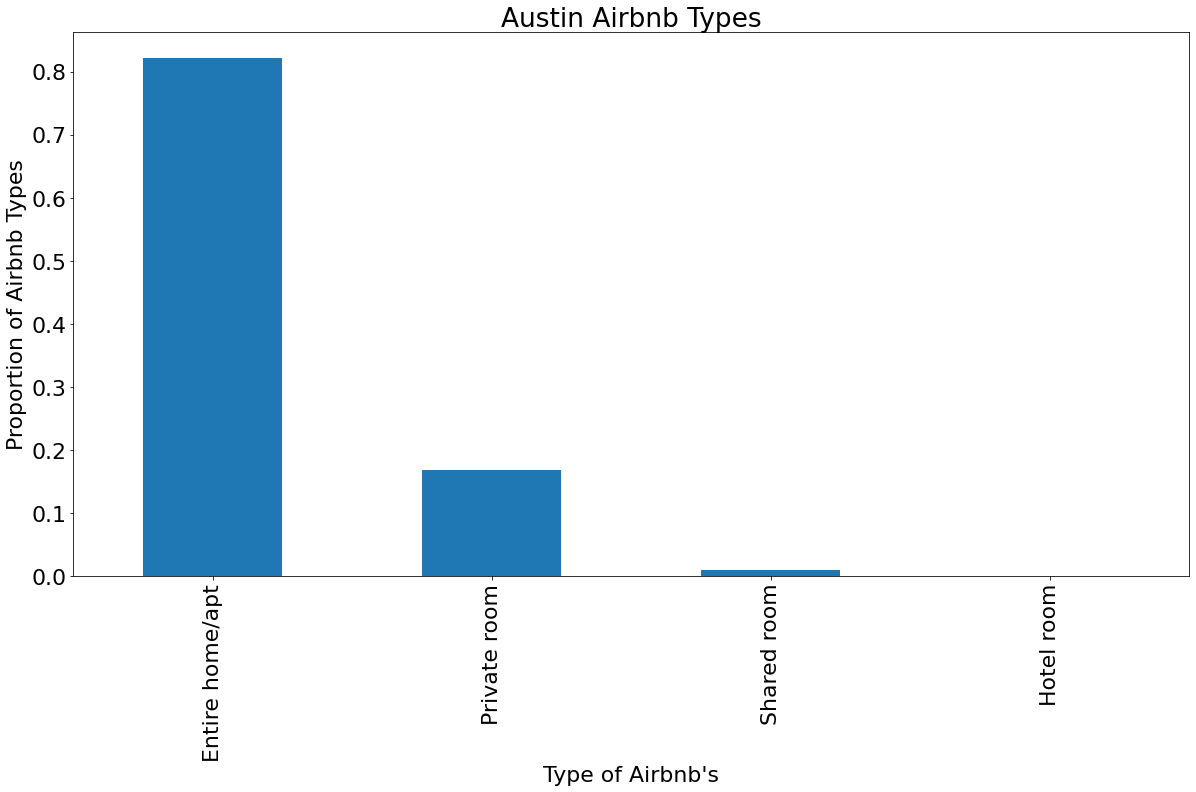

In [11]:
room_type_counts = df_austin.room_type.value_counts()
print(room_type_counts/df_austin.shape[0])
(room_type_counts/df_austin.shape[0]).plot(kind="bar")
plt.title("Austin Airbnb Types")
plt.ylabel('Proportion of Airbnb Types')
plt.xlabel('Type of Airbnb\'s')

Entire home/apt    0.853369
Private room       0.127005
Shared room        0.019060
Hotel room         0.000566
Name: room_type, dtype: float64


Text(0.5, 0, "Type of Airbnb's")

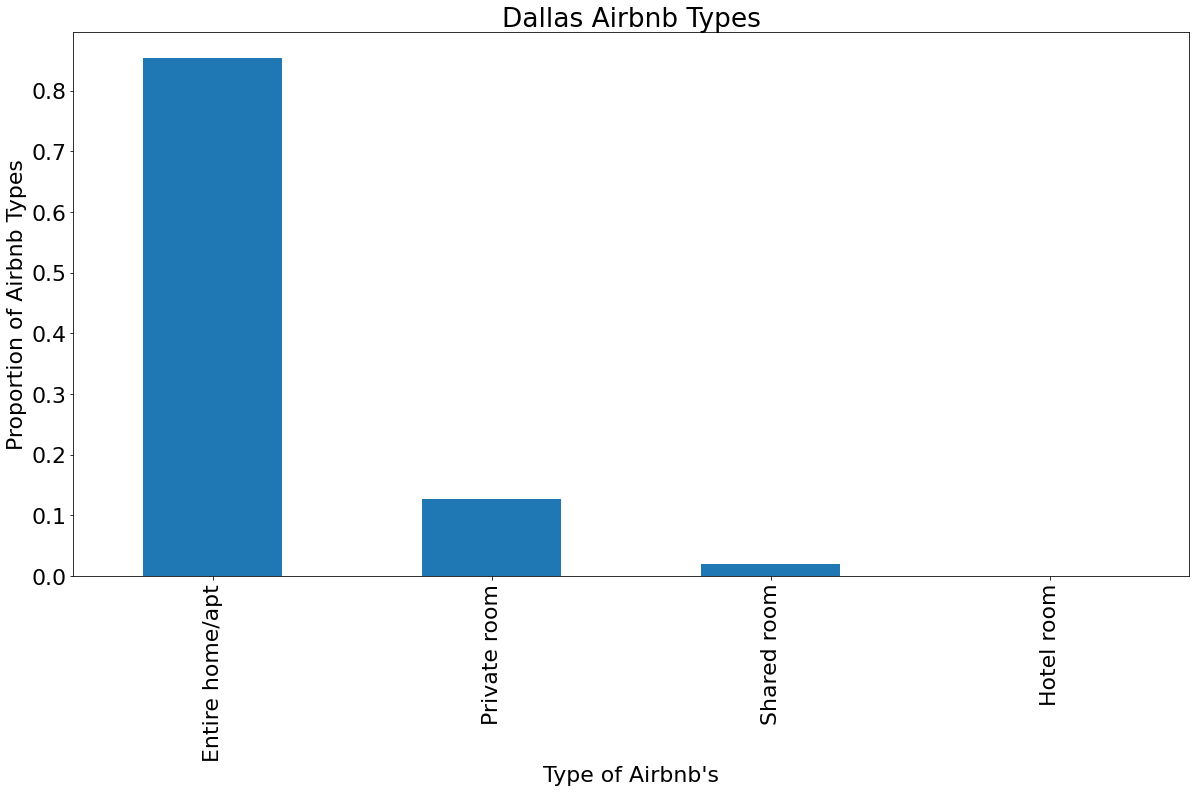

In [12]:
room_type_counts = df_dallas.room_type.value_counts()
print(room_type_counts/df_dallas.shape[0])
(room_type_counts/df_dallas.shape[0]).plot(kind="bar")
plt.title("Dallas Airbnb Types")
plt.ylabel('Proportion of Airbnb Types')
plt.xlabel('Type of Airbnb\'s')

**6.** Which 5 areas have the most airbnb's in each dataset?

Text(0.5, 0, 'Area Name (Zipcode)')

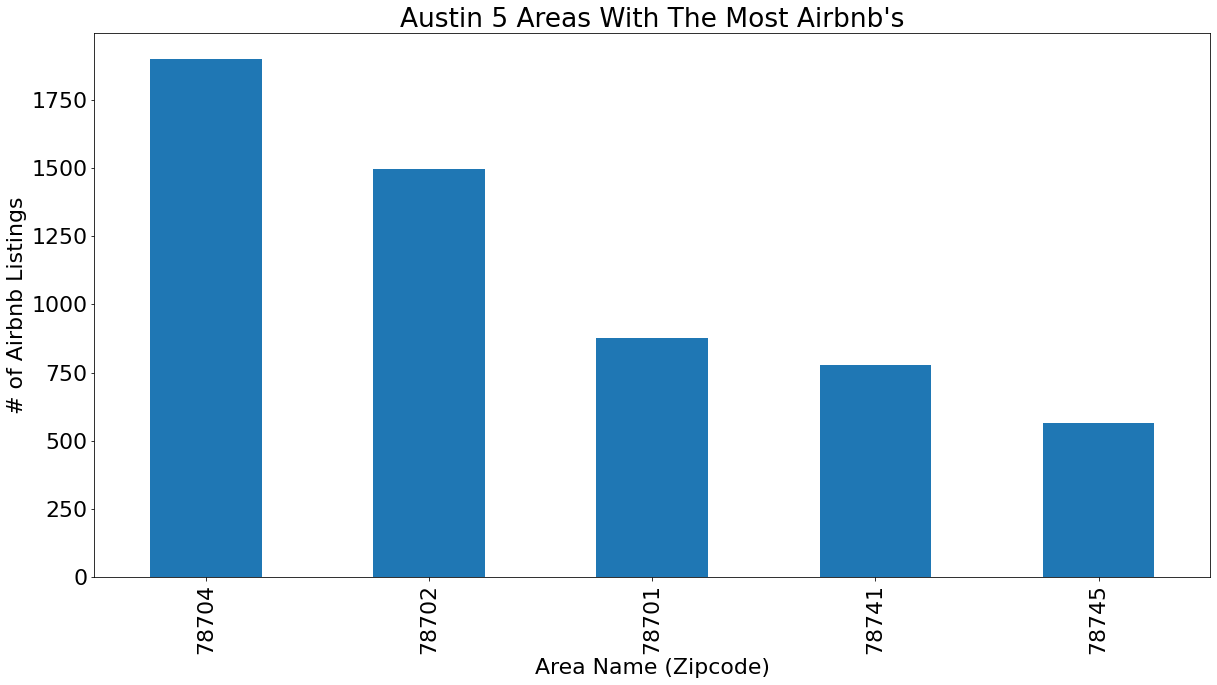

In [13]:
neighbourhood_count = df_austin.neighbourhood.value_counts()
neighbourhood_count_10 = neighbourhood_count[:5]
(neighbourhood_count_10).plot(kind="bar")
plt.title("Austin 5 Areas With The Most Airbnb's")
plt.ylabel('# of Airbnb Listings')
plt.xlabel('Area Name (Zipcode)')

Text(0.5, 0, 'Area Name')

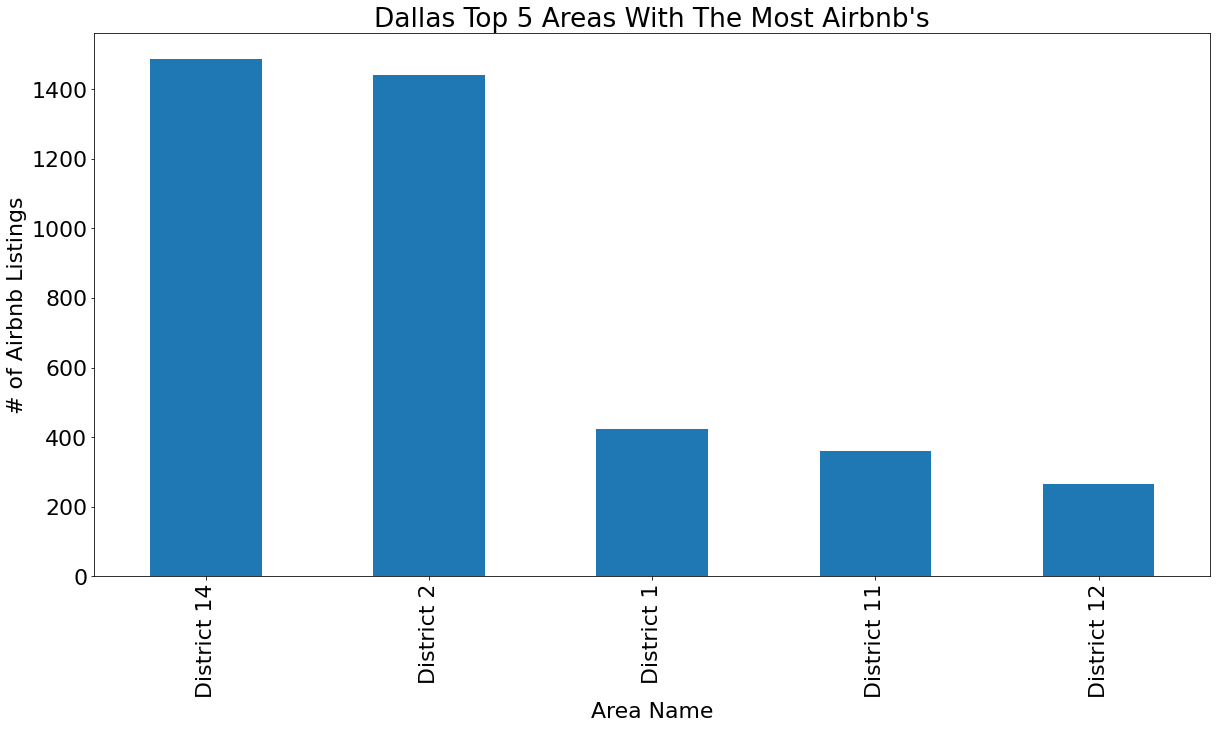

In [14]:
neighbourhood_count = df_dallas.neighbourhood.value_counts()
neighbourhood_count_10 = neighbourhood_count[:5]
(neighbourhood_count_10).plot(kind="bar")
plt.title("Dallas Top 5 Areas With The Most Airbnb's")
plt.ylabel('# of Airbnb Listings')
plt.xlabel('Area Name')

**From** our introductory data assessment I see a few imporant details: 

1. The datasets are significantly different in size with the Austin dataset having approximately twice as many data as the Dallas dataset. This is interesting, since Dallas has more people I would have thought Dallas would have more airbnb's listed.


2. Even though the datasets are different sizes, the columns are the same for each dataset. 


3. A majority of the columns do not have any missing values which will make it a little easier for us when we try and predict some data. Interestingly a difference between the two datasets in regards to missing data is the Austin dataset had some host names missing, while the Dallas dataset did not. 


4. The "Entire home/apt" room types dominate both datasets, with more than 80% of the airbnb's falling within this category.


5. In both datasets, it seems like there is a significant decrease in airbnb listings from the second to the third spot. I wonder if the quantity of airbnb's in each area have any correlation to the crime rate in that area. A good idea to represent this data would be to use a map of each city in this notebook and do a heatmap with each district/zipcode. The darker the color the more airbnb listings in that area.

<h3> Buisness Question 1 </h3>

**1.** How do the prices for the Dallas airbnb's compare with the Austin airbnb's?

**Find** the minimum and maximum price for each dataset.

In [15]:
print("The Austin dataset has a minimum price of {} and a maximum price of {}".format(df_austin.price.min(), 
                                                                                           df_austin.price.max()))

print("The Dallas dataset has a minimum price of {} and a maximum price of {}".format(df_dallas.price.min(), 
                                                                                      df_dallas.price.max()))

print("\nSo your telling me somebody in Austin is renting their place out for Free?!")

The Austin dataset has a minimum price of 0 and a maximum price of 20000
The Dallas dataset has a minimum price of 10 and a maximum price of 9999

So your telling me somebody in Austin is renting their place out for Free?!


**Show** the price data in a box and whisker plot.

<AxesSubplot:title={'center':'Austin vs Dallas Airbnb Median Price Comparison'}, xlabel='Cities', ylabel='Price in $'>

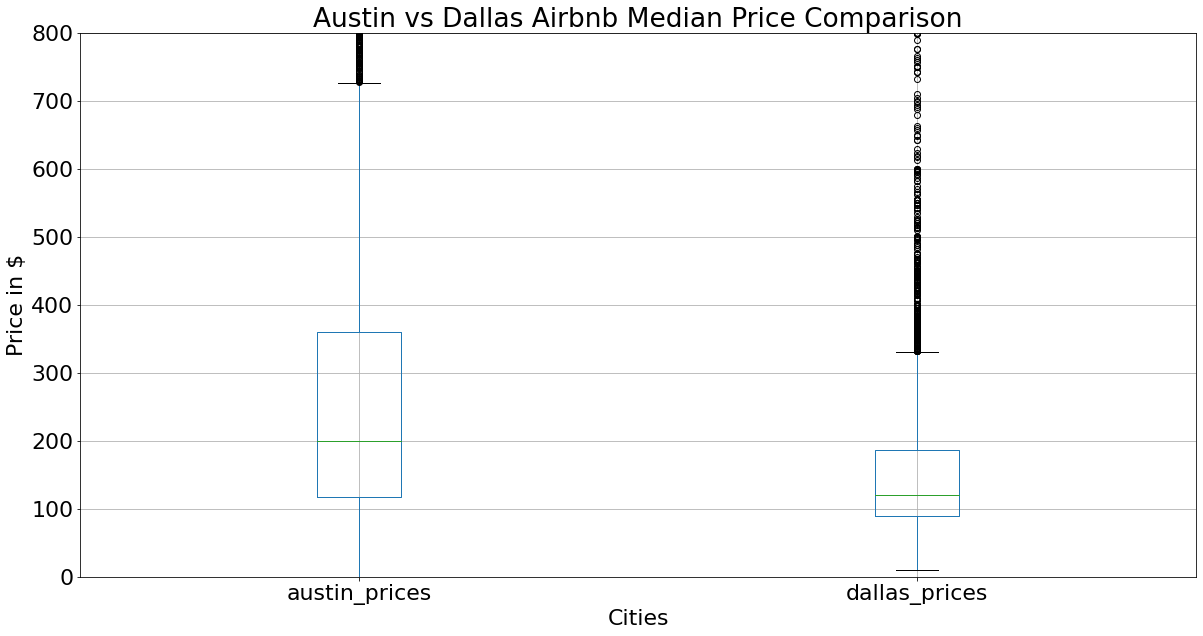

In [16]:
df_both_prices = pd.concat([df_austin.price.rename("austin_prices"),df_dallas.price.rename("dallas_prices")], axis=1)
plt.ylim(0,800)
plt.title('Austin vs Dallas Airbnb Median Price Comparison')
plt.ylabel('Price in $')
plt.xlabel('Cities')
df_both_prices.boxplot()

In [17]:
austin_quantile = df_both_prices.austin_prices.quantile([.25,.5,.75])
austin_whiskers = (austin_quantile.iloc[2] - austin_quantile.iloc[0]) * 1.5
austin_high_whisker = austin_whiskers + austin_quantile.iloc[2]
austin_low_whisker = df_both_prices.austin_prices.min()

dallas_quantile = df_both_prices.dallas_prices.quantile([.25,.5,.75])
dallas_whiskers = (dallas_quantile.iloc[2] - dallas_quantile.iloc[0]) * 1.5
dallas_high_whisker = dallas_whiskers + dallas_quantile.iloc[2]
dallas_low_whisker = df_both_prices.dallas_prices.min()

print("The Austin Airbnb's have a median price of {}, a first quartile value of {}, and a third quartile of {}.\n"
      "The prices that are outliers for the Austin Airbnb dataset are over {}. There are no lower outliers, because \n"
      "the whisker stops at the farthest data point within that interval which is {}."
      .format(austin_quantile.iloc[1], austin_quantile.iloc[0], austin_quantile.iloc[2], austin_high_whisker,
              austin_low_whisker))

print("\nThe Dallas Airbnb's have a median price of {}, a first quartile value of {}, and a third quartile of {}.\n"
     "The prices that are outliers for the Dallas Airbnb data set are over {}. There are no lower outliers, because \n"
     "the whisker stops at the farthest data point within that interval which is {}."
     .format(dallas_quantile.iloc[1], dallas_quantile.iloc[0], dallas_quantile.iloc[2],dallas_high_whisker, 
             dallas_low_whisker))


The Austin Airbnb's have a median price of 200.0, a first quartile value of 116.75, and a third quartile of 361.0.
The prices that are outliers for the Austin Airbnb dataset are over 727.375. There are no lower outliers, because 
the whisker stops at the farthest data point within that interval which is 0.

The Dallas Airbnb's have a median price of 121.0, a first quartile value of 89.0, and a third quartile of 186.0.
The prices that are outliers for the Dallas Airbnb data set are over 331.5. There are no lower outliers, because 
the whisker stops at the farthest data point within that interval which is 10.0.


**Response** to Buisness Question 1

As you can see from the maximum price values for each dataset, it looks like there are some significant outliers. This is why the median was chosen to compare prices instead of the mean. The Austin median price is significantly higher than the Dallas median price. This takes me by surprise, as I thought the airbnbs in both of these areas would be similarly priced. 

<h3> Buisness Question 2 </h3>

**2.** Do the number of reviews have some kind of a relationship with the availability? Are there any numerical columns that have a high correlation with other columns?



In [18]:
df_austin.drop(["license","neighbourhood_group"], axis=1).corr(method='pearson')

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,0.169382,0.028541,0.043658,0.041874,-0.017041,-0.005478,-0.139687,0.070339,0.128001,0.227360,-0.149032
host_id,0.169382,1.000000,0.102785,0.101401,-0.001701,-0.006424,0.049046,-0.174489,0.153194,0.289311,0.253575,-0.012383
neighbourhood,0.028541,0.102785,1.000000,0.259451,-0.078626,-0.128528,0.048910,-0.101021,-0.028719,0.109237,0.088277,-0.065273
latitude,0.043658,0.101401,0.259451,1.000000,0.080387,-0.015674,0.049398,-0.042840,-0.029821,0.116385,0.097015,-0.045406
longitude,0.041874,-0.001701,-0.078626,0.080387,1.000000,-0.107257,0.009685,0.000013,0.021760,0.030667,-0.094033,-0.003311
price,-0.017041,-0.006424,-0.128528,-0.015674,-0.107257,1.000000,-0.020337,-0.039629,-0.054499,-0.017970,0.119404,-0.029673
minimum_nights,-0.005478,0.049046,0.048910,0.049398,0.009685,-0.020337,1.000000,-0.067062,-0.094210,0.189396,0.123768,-0.107589
number_of_reviews,-0.139687,-0.174489,-0.101021,-0.042840,0.000013,-0.039629,-0.067062,1.000000,0.585715,-0.094512,0.031499,0.685405
reviews_per_month,0.070339,0.153194,-0.028719,-0.029821,0.021760,-0.054499,-0.094210,0.585715,1.000000,0.016272,0.182397,0.844421
calculated_host_listings_count,0.128001,0.289311,0.109237,0.116385,0.030667,-0.017970,0.189396,-0.094512,0.016272,1.000000,0.360098,-0.078139


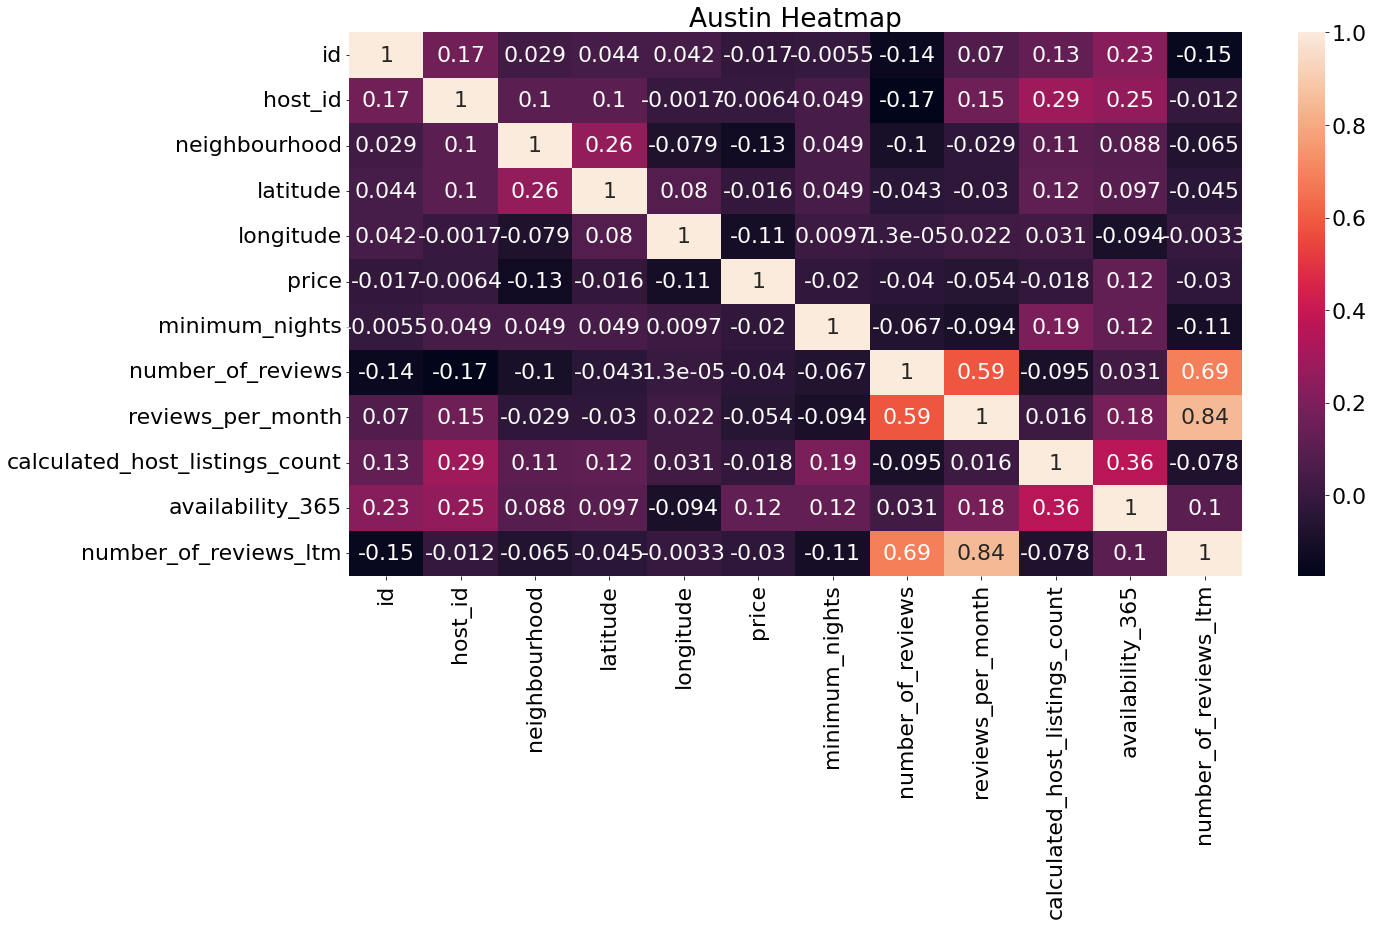

In [19]:
ax=plt.axes()
sns.heatmap(df_austin.drop(["license","neighbourhood_group"], axis=1).corr(method='pearson'), annot=True,ax=ax)
ax.set_title("Austin Heatmap")
plt.show()

In [20]:
df_dallas.drop(["license","neighbourhood_group"], axis=1).corr(method='pearson')

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,0.238919,0.073443,-0.034311,0.025804,-0.028026,-0.206640,0.098217,-0.089329,0.191234,-0.232404
host_id,0.238919,1.000000,0.061458,-0.044407,-0.004584,-0.057116,-0.231262,0.099273,-0.142316,0.101304,-0.095531
latitude,0.073443,0.061458,1.000000,0.074794,-0.008872,0.059484,-0.115614,-0.157401,-0.032737,0.012263,-0.153938
longitude,-0.034311,-0.044407,0.074794,1.000000,0.012090,-0.013813,0.002723,-0.026166,-0.038181,0.003855,0.000933
price,0.025804,-0.004584,-0.008872,0.012090,1.000000,0.003967,-0.044000,-0.016242,-0.033676,0.024672,-0.038586
minimum_nights,-0.028026,-0.057116,0.059484,-0.013813,0.003967,1.000000,-0.119538,-0.175241,0.209967,0.018073,-0.171276
number_of_reviews,-0.206640,-0.231262,-0.115614,0.002723,-0.044000,-0.119538,1.000000,0.530797,-0.143305,-0.052073,0.744233
reviews_per_month,0.098217,0.099273,-0.157401,-0.026166,-0.016242,-0.175241,0.530797,1.000000,-0.244522,0.041628,0.765793
calculated_host_listings_count,-0.089329,-0.142316,-0.032737,-0.038181,-0.033676,0.209967,-0.143305,-0.244522,1.000000,0.025023,-0.182170
availability_365,0.191234,0.101304,0.012263,0.003855,0.024672,0.018073,-0.052073,0.041628,0.025023,1.000000,-0.019046


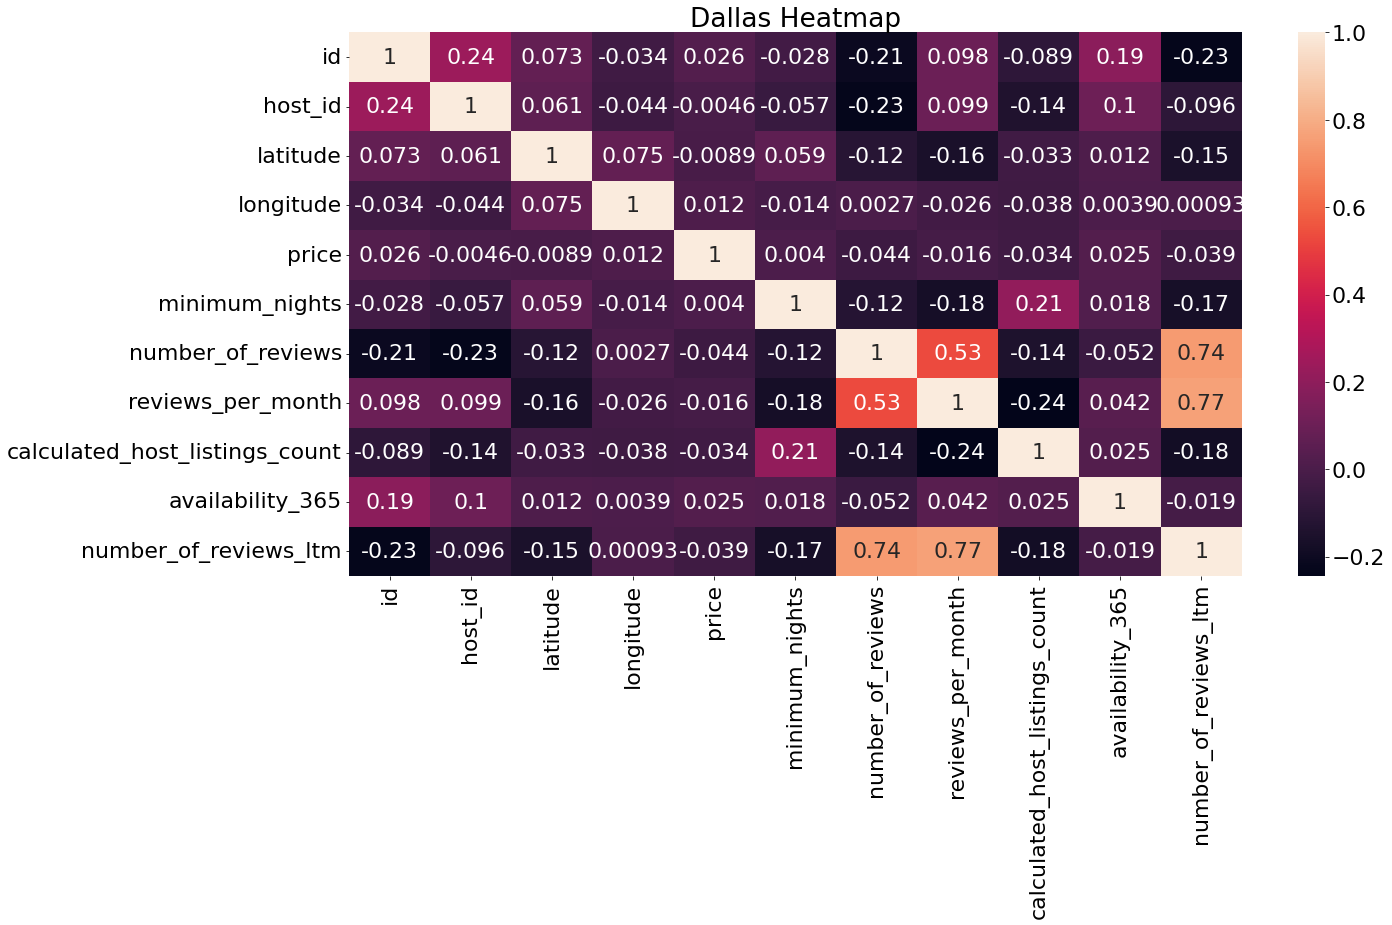

In [21]:
ax=plt.axes()
sns.heatmap(df_dallas.drop(["license","neighbourhood_group"], axis=1).corr(method='pearson'), annot=True,ax=ax)
ax.set_title("Dallas Heatmap")
plt.show()

**Response** To Buisness Question 2.

It does not look like price has a significant relationship with any numerical value in this dataset. All the values are below a .3 correlation.

Between the number of reviews and the availability, there is negligible correlation. I was predicting there would be at least some relationship between these two coulmns because I thought the more reviews per month a place had, the less availability there would be. 

It looks like the number of reviews in the last twelve month column has a high correlation (above .69 for both datasets) with the number of reviews the property has total and reviews per month. This does not surprise me because if you have a review in the last twelve months then you have a review in the total count and it would also effect the reviews per month data.


<h3> Clean the Data - Preperation so that our data can be used in a Linear Regression Model</h3>

**Lets** clean our data. First, we can get rid of the license and neighbourhood_group columns in both data sets because the values in those columns are all missing. 

In [22]:
df_austin.drop(inplace=True, columns=["license","neighbourhood_group"])
df_dallas.drop(inplace=True, columns=["license","neighbourhood_group"])
print("The columns with missing values in the Austin Dataset are: \n{} \n\nThe columns with missing values in the Dallas "
      "dataset are: \n{}".format(df_austin.loc[:,df_austin.isna().mean() != 0].isna().mean(),
                               df_dallas.loc[:,df_dallas.isna().mean() != 0].isna().mean()))

The columns with missing values in the Austin Dataset are: 
host_name            0.000251
last_review          0.246074
reviews_per_month    0.246074
dtype: float64 

The columns with missing values in the Dallas dataset are: 
last_review          0.202302
reviews_per_month    0.202302
dtype: float64


**Now** we determine variables that are categorical. Lets see which columns in each dataset have categorical variables:

In [23]:
cat_austin = df_austin.loc[:,df_austin.dtypes==object]
cat_dallas = df_dallas.loc[:,df_dallas.dtypes==object]

print("The Austin Data set has {} categorical columns. They are: \n{}\n\n" 
      "The Dallas Data set has {} categorical columns. They are: \n{}\n".format(cat_austin.shape[1], cat_austin.columns, 
                                                                                   cat_dallas.shape[1], cat_dallas.columns))

The Austin Data set has 4 categorical columns. They are: 
Index(['name', 'host_name', 'room_type', 'last_review'], dtype='object')

The Dallas Data set has 5 categorical columns. They are: 
Index(['name', 'host_name', 'neighbourhood', 'room_type', 'last_review'], dtype='object')



**Comparing** our list of categorical variables with the list of columns with missing values, it looks like the reviews_per_month column is the only column left in both datasets that has the integer data type with some missing values. Lets take care of this column by filling in -1 everywhere there is a missing value in this column. That way we can utilize the missing data and see if it helps improve our model. 

In [24]:
df_austin.reviews_per_month.fillna(-1,inplace=True)
df_dallas.reviews_per_month.fillna(-1,inplace=True)
print("The columns with missing values in the austin Dataset are: \n{} \n\nThe columns with missing values in the Dallas"
      " dataset are: \n{}".format(df_austin.loc[:,df_austin.isna().mean() != 0].isna().mean(),
                               df_dallas.loc[:,df_dallas.isna().mean() != 0].isna().mean()))

The columns with missing values in the austin Dataset are: 
host_name      0.000251
last_review    0.246074
dtype: float64 

The columns with missing values in the Dallas dataset are: 
last_review    0.202302
dtype: float64


**We** only have categorical columns in both data sets that have missing values now. Lets create dummy variables for these columns. We will also create a dummy columns for any missing data.

In [25]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, 
                                                                 dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [26]:
df_austin_cleaned = create_dummy_df(df_austin,cat_austin.columns,True)
df_dallas_cleaned = create_dummy_df(df_dallas,cat_dallas.columns,True)

print("There are {} missing values in the Austin dataset. \nThere are {} missing values in the Dallas dataset."
      .format(df_austin_cleaned.isnull().sum().sum(),df_dallas_cleaned.isnull().sum().sum()))

There are 0 missing values in the Austin dataset. 
There are 0 missing values in the Dallas dataset.


**Buisness Question 3**

I will see if I can predict the price at the Dallas location first. If I run into problems with creating an accurate model with the Dallas location, I assume that the same thing would happen with the Austin dataset, Since they have the same columns.

**3.** How well can we predict the price of an airbnb at the Dallas location?

In [27]:
y_dallas = df_dallas_cleaned["price"]
X_dallas = df_dallas_cleaned.drop(["price"],axis=1)

In [28]:
def fit_linear_mod(X,y,test_size = .3):
    '''
    INPUT:
    X - explanatory variable
    y - response variable
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    '''
    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    lm_model = make_pipeline(StandardScaler(with_mean=False), LinearRegression()) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test, y_test_preds, y_train_preds
    

In [29]:
test_score_dallas, train_score_dallas, lm_model_dallas, X_train_dallas, X_test_dallas, y_train_dallas, y_test_dallas, y_test_preds_dallas, y_train_preds_dallas = fit_linear_mod(X_dallas,y_dallas)


In [30]:
print("The train and test scores we got from the model predicting the price for the Dallas dataset are:\n"
      "Train Score:    {}\n"
      "Test Score:    {}\n\n"
      "Based on the train score and test score, it looks like our model is overfitted and doesn't do a good job\n"
      "predicting new price values. The test score is approximently negative infinity, which indicates the model\n"
      "is worse at predicting values than if we predicted the price to be the average price of the entire dataset\n"
      "for every prediction."
      .format(train_score_dallas,test_score_dallas))

The train and test scores we got from the model predicting the price for the Dallas dataset are:
Train Score:    0.9986779423920016
Test Score:    -9.161593324667094e+24

Based on the train score and test score, it looks like our model is overfitted and doesn't do a good job
predicting new price values. The test score is approximently negative infinity, which indicates the model
is worse at predicting values than if we predicted the price to be the average price of the entire dataset
for every prediction.


**Lets** try and make the r2 score better for our model, to do this I believe we have to exclude some data that is not helping the model we just made. Lets try and find out what columns have unique values in all of the rows.

In [31]:
df_dallas_id = set(df_dallas.id)
df_austin_id = set(df_austin.id)
print("The total number of rows in the Dallas dataset is {}. The \"id\" column had {} unique numbers\n" 
      "in the Dallas dataset. All of the rows are unique under the \"id\" columns so we will drop\n"
      "that column. I also decided to drop the \"name\", \"host_name\", \"latitude\", and \"longitude\"\n"
      "columns from the dataset to see if that would help our r2 score.\n"
      .format(df_dallas.shape[0],len(df_dallas_id)))
df_dallas.drop(inplace=True, columns=["id","name","host_name","latitude","longitude"])


The total number of rows in the Dallas dataset is 5299. The "id" column had 5299 unique numbers
in the Dallas dataset. All of the rows are unique under the "id" columns so we will drop
that column. I also decided to drop the "name", "host_name", "latitude", and "longitude"
columns from the dataset to see if that would help our r2 score.



In [32]:
df_dallas_cleaned = create_dummy_df(df_dallas,cat_dallas.drop(columns=['host_name','name']).columns,True)

y_dallas = df_dallas_cleaned["price"]
X_dallas = df_dallas_cleaned.drop(["price"],axis=1)

test_score_dallas, train_score_dallas, lm_model_dallas, X_train_dallas, X_test_dallas, y_train_dallas, y_test_dallas, y_test_preds_dallas, y_train_preds_dallas = fit_linear_mod(X_dallas,y_dallas)


**Response** To Buisness Question 3.

In [33]:
print("The train and test scores we got from the model predicting the price for the Dallas dataset are:\n"
      "Train Score:    {}\n"
      "Test Score:    {}\n\n"
      "So dropping the previously mentioned columns did not significantly improve our model. We either need more\n"
      "data to be able to predict prices more effectivly or I need more knowledge to be able to make this model\n"
      "perform better. Here are some things that I believe would help improve our airbnb price prediction model:\n\n"
      "1. A column describing how many people each airbnb can house or the total sqaure feet in each airbnb.\n\n"
      "2. A technique that could help our model is analyzing the words in the reviews and determining if the airbnb\n"
      "is a good or bad place to stay. If we could determine if an airbnb had mostly good or bad reviews, we could\n"
      "add another column to our data and classify each of the airbnb units with this new information.\n\n"
      "3. It may be possible to use image recognition and classify the pictures as good or bad. If this could be done\n"
      "we could add another column to our data and classify each of the airbnb units with this new information."
      .format(train_score_dallas,test_score_dallas))

The train and test scores we got from the model predicting the price for the Dallas dataset are:
Train Score:    -0.044846677458582285
Test Score:    -1.0941354377290373e+25

So dropping the previously mentioned columns did not significantly improve our model. We either need more
data to be able to predict prices more effectivly or I need more knowledge to be able to make this model
perform better. Here are some things that I believe would help improve our airbnb price prediction model:

1. A column describing how many people each airbnb can house or the total sqaure feet in each airbnb.

2. A technique that could help our model is analyzing the words in the reviews and determining if the airbnb
is a good or bad place to stay. If we could determine if an airbnb had mostly good or bad reviews, we could
add another column to our data and classify each of the airbnb units with this new information.

3. It may be possible to use image recognition and classify the pictures as good or bad. I